In [ ]:
import pandas as pd

# read in excel data
public_data = pd.read_excel('../Data/BCW Public and Private Original Data/Raw Excel Public and Private Data/public_data.xlsx')
private_data2123 = pd.read_excel('../Data/BCW Public and Private Original Data/Raw Excel Public and Private Data/private_2123.xlsx')
private_data2324 = pd.read_excel('../Data/BCW Public and Private Original Data/Raw Excel Public and Private Data/private_2324.xlsx')

# combine old & new private data, change column name to Start_Date for easier merging
private_data = pd.concat([private_data2123, private_data2324])
private_data['lat'] = pd.to_numeric(private_data['lat'])
private_data['long'] = pd.to_numeric(private_data['long'])

private_data.to_csv('../Data/BCW Public and Private Original Data/Public and Private csv/combined_private_data.csv', index=False)

private_data.rename(columns={"Date of WW\nRelease": "Start_Date"}, inplace=True)
private_data.drop('Zipcode', axis=1, inplace=True)

# private_data.head()
public_data.head()

OSError: Cannot save file into a non-existent directory: '../overflow_data'

In [2]:
#convert for proper formatting
#print(public_data["Start_Time"].unique())
#print(public_data["End_Time"].unique())

public_data["Start_Time"] = public_data["Start_Time"].astype(str).str.strip()
public_data["End_Time"] = public_data["End_Time"].astype(str).str.strip()

public_data["Start_Time"] = public_data["Start_Time"].apply(lambda x: str(x).strip() if pd.notnull(x) else x)
public_data["End_Time"] = public_data["End_Time"].apply(lambda x: str(x).strip() if pd.notnull(x) else x)


In [3]:
#convert to start_minutes and end_minutes for easier average calculations
public_data["Start_Minutes"] = public_data["Start_Time"].apply(
    lambda x: int(x.split(":")[0]) * 60 + int(x.split(":")[1]) if pd.notnull(x) and ":" in str(x) else None
)

public_data["End_Minutes"] = public_data["End_Time"].apply(
    lambda x: int(x.split(":")[0]) * 60 + int(x.split(":")[1]) if pd.notnull(x) and ":" in str(x) else None
)

print(public_data[["Start_Time", "Start_Minutes", "End_Time", "End_Minutes"]].head())

  Start_Time  Start_Minutes End_Time  End_Minutes
0       8:35          515.0    11:11        671.0
1      11:40          700.0    11:40        700.0
2      12:25          745.0    13:47        827.0
3      13:44          824.0    13:44        824.0
4      14:55          895.0    14:55        895.0


In [4]:
#resolution time calculation
public_data["Resolution_Duration"] = public_data["End_Minutes"] - public_data["Start_Minutes"]

In [5]:
#now compute averages
import datetime
avg_duration_zero = public_data[public_data["Gallons"] == 0]["Resolution_Duration"].mean()
avg_duration_nonzero = public_data[public_data["Gallons"] > 0]["Resolution_Duration"].mean()
def minutes_to_time(minutes):
    return datetime.time(int(minutes // 60), int(minutes % 60)) if not pd.isnull(minutes) else None

avg_duration_zero_time = minutes_to_time(avg_duration_zero)
avg_duration_nonzero_time = minutes_to_time(avg_duration_nonzero)

# Print results
print(f"Average Resolution Time (Zero Gallons): {avg_duration_zero:.2f} minutes ({avg_duration_zero_time})")
print(f"Average Resolution Time (Non-Zero Gallons): {avg_duration_nonzero:.2f} minutes ({avg_duration_nonzero_time})")


Average Resolution Time (Zero Gallons): 6.43 minutes (00:06:00)
Average Resolution Time (Non-Zero Gallons): 118.90 minutes (01:58:00)


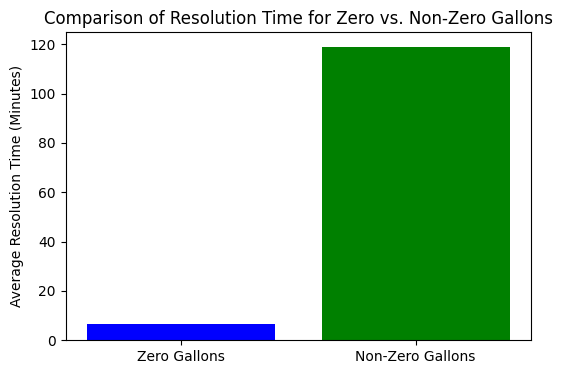

In [6]:
import matplotlib.pyplot as plt

categories = ["Zero Gallons", "Non-Zero Gallons"]
values = [avg_duration_zero, avg_duration_nonzero]

plt.figure(figsize=(6, 4))
plt.bar(categories, values, color=["blue", "green"])
plt.ylabel("Average Resolution Time (Minutes)")
plt.title("Comparison of Resolution Time for Zero vs. Non-Zero Gallons")
plt.show()


/var/folders/vl/gkbcx4z53ns2ghqy_s_hw6740000gn/T/ipykernel_75112/132724030.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([zero_gallons_duration, nonzero_gallons_duration], labels=['Zero Gallons', 'Non-Zero Gallons'])


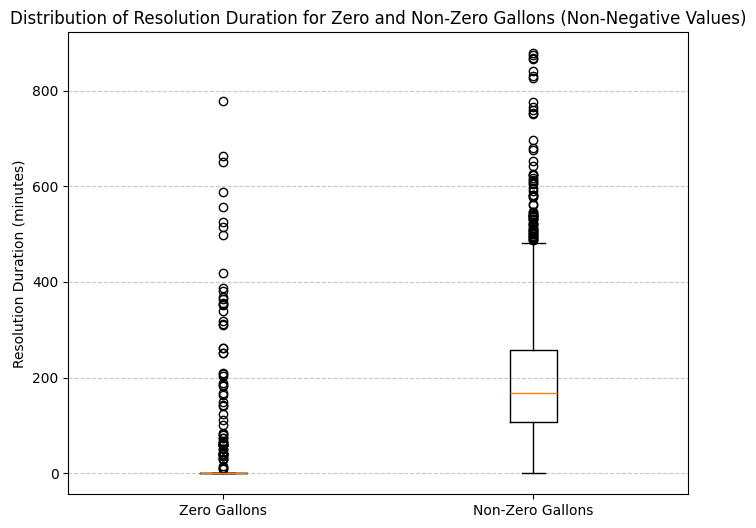

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

#removes negative resolution durations that do not max sense in this context
public_data = public_data[public_data["Resolution_Duration"] >= 0]

zero_gallons_duration = public_data[public_data["Gallons"] == 0]["Resolution_Duration"]
nonzero_gallons_duration = public_data[public_data["Gallons"] > 0]["Resolution_Duration"]

#creating the box plot
plt.figure(figsize=(8, 6))
plt.boxplot([zero_gallons_duration, nonzero_gallons_duration], labels=['Zero Gallons', 'Non-Zero Gallons'])
plt.ylabel("Resolution Duration (minutes)")
plt.title("Distribution of Resolution Duration for Zero and Non-Zero Gallons (Non-Negative Values)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [8]:
num_zeros = (public_data["Gallons"] == 0).sum()
total_rows = len(public_data)
percentage_zeros = (num_zeros / total_rows) * 100

print(f"Number of zero-gallon cases: {num_zeros} out of {total_rows} ({percentage_zeros:.2f}%)")


Number of zero-gallon cases: 1886 out of 3225 (58.48%)
